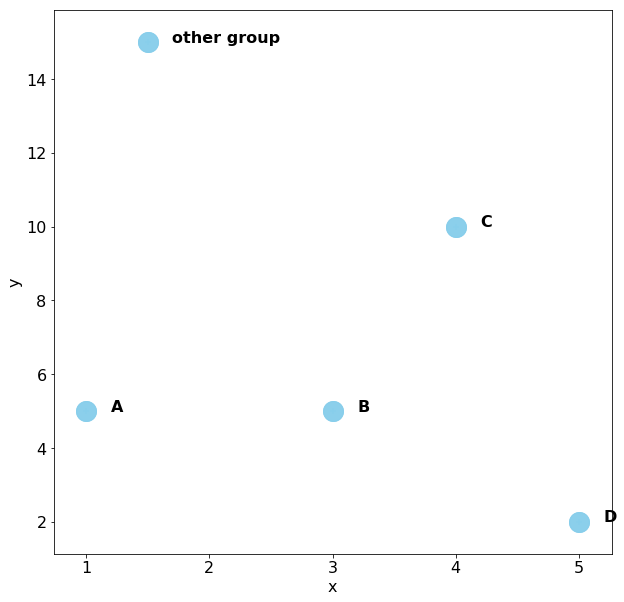

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import matplotlib

matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,10))

# Create dataframe
df = pd.DataFrame({
'x': [1, 1.5, 3, 4, 5],
'y': [5, 15, 5, 10, 2],
'group': ['A','other group','B','C','D']
})
 
sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="+", color="skyblue")
#sns.plt.show()

# basic plot
p1=sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})
 

# basic plot
p1=sns.regplot(data=df, x="x", y="y", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,df.shape[0]):
     p1.text(df.x[line]+0.2, df.y[line], df.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
 
plt.show()


In [13]:
!head motif_comparisons_summary.txt

HNF4A:M4698_1.02
scores_ism mean scores 0.22993258388073315
scores_ism median indiv perf 0.20998559539570083
scores_ism min indiv perf 0.13313819540807006
scores_ism max indiv perf 0.2741864549676427
scores_ism argmax indiv perf 7
scores_ism record_8 indiv perf 0.2741864549676427
scores_ism record_3 indiv perf 0.22552829234400304
scores_deeplift_rescale_dinucshuff mean scores 0.3494914078708245
scores_deeplift_rescale_dinucshuff median indiv perf 0.3291170787463811


In [43]:
from collections import defaultdict

def parse_motif_file(motif_file):

    fh = open(motif_file,'r')
    motif_to_method_to_measure_to_val = defaultdict(lambda: defaultdict(dict))
    motif_name = None
    for line in fh:
        line = line.rstrip()
        if 'M' in line:
            motif_name = line
        else:
            arr = line.split(" ")
            method = arr[0]
            val = float(arr[-1])
            measure = "_".join(arr[1:-1])
            motif_to_method_to_measure_to_val[motif_name][method][measure] = val

    return motif_to_method_to_measure_to_val

motif_to_method_to_measure_to_val = parse_motif_file("motif_comparisons_summary.txt")

In [44]:
motif_to_method_to_measure_to_val.keys()

['HNF1A:M6281_1.02',
 'HNF4A:M4698_1.02',
 'FOXA2:M4567_1.02',
 'NR2F1:M6176_1.02',
 'NR1H2:M6383_1.02',
 'RXRG:M6462_1.02',
 'HNF4G:M2286_1.02',
 'HNF1B:M6282_1.02']

In [45]:
motif_to_method_to_measure_to_val['HNF1A:M6281_1.02'].keys()

['scores_integrated_grad20_flatref',
 'scores_integrated_grad10_dinucshuff',
 'scores_deeplift_genomicsdefault_dinucshuff',
 'scores_integrated_grad20_dinucshuff',
 'scores_integrated_grad5_dinucshuff',
 'scores_deeplift_rescale_dinucshuff',
 'scores_deeplift_rescale_flatref',
 'scores_grad_times_inp_flatref',
 'scores_integrated_grad2_dinucshuff',
 'scores_deeplift_rescale_avgposref',
 'scores_ism',
 'scores_deeplift_genomicsdefault_flatref',
 'scores_deeplift_genomicsdefault_avgposref',
 'scores_integrated_grad20_avgposref']

In [46]:
motif_to_method_to_measure_to_val['HNF1A:M6281_1.02']['scores_integrated_grad20_flatref'].keys()

['record_3_indiv_perf',
 'argmax_indiv_perf',
 'max_indiv_perf',
 'min_indiv_perf',
 'record_8_indiv_perf',
 'median_indiv_perf',
 'mean_scores']

[('scores_ism', 'ISM'), ('scores_deeplift_rescale_dinucshuff', 'DL-Rescale\n-ShuffRef'), ('scores_deeplift_genomicsdefault_dinucshuff', 'DL-Default\n-ShuffRef'), ('scores_grad_times_inp_flatref', 'Grad*\nInput'), ('scores_integrated_grad20_dinucshuff', 'IntGrad-20\n-ShuffRef')]


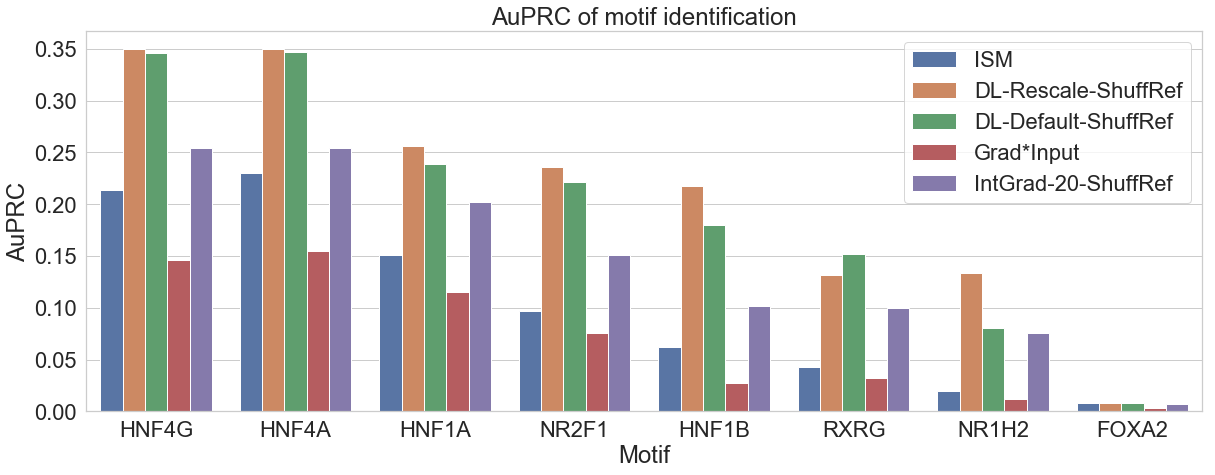

HNF4G:M2286_1.02


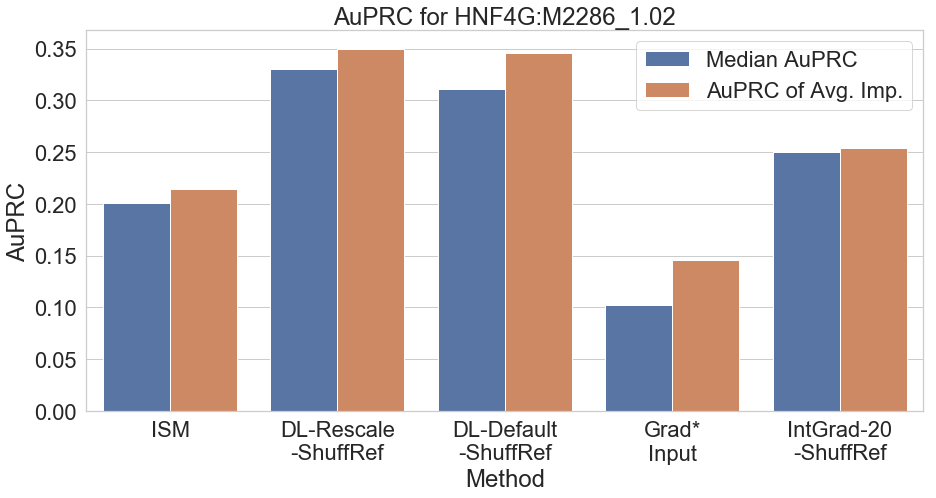

HNF4A:M4698_1.02


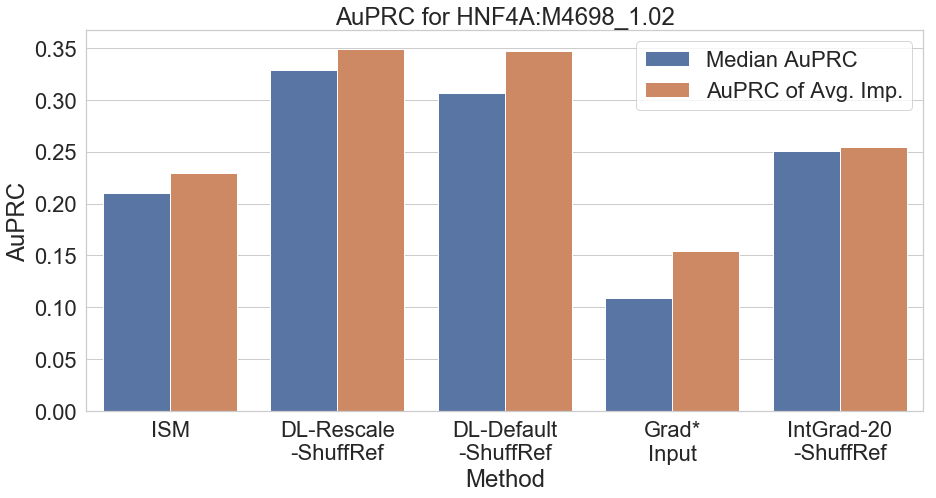

HNF1A:M6281_1.02


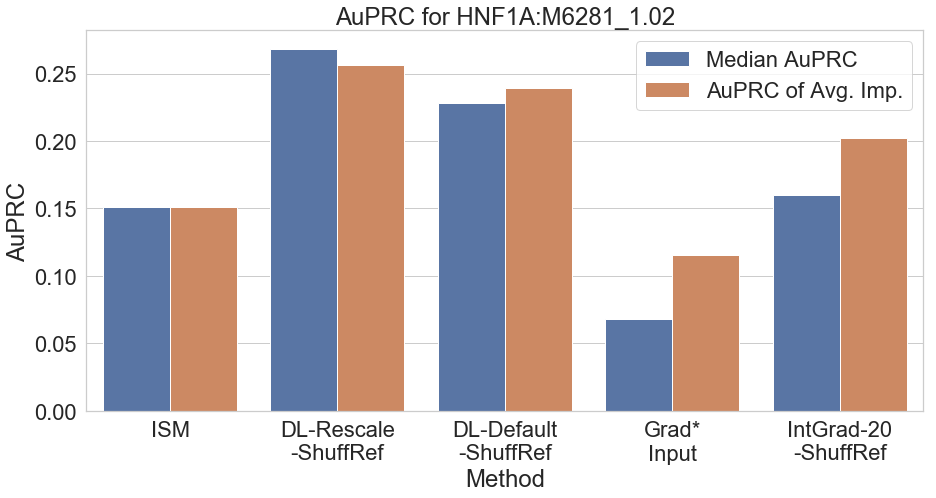

NR2F1:M6176_1.02


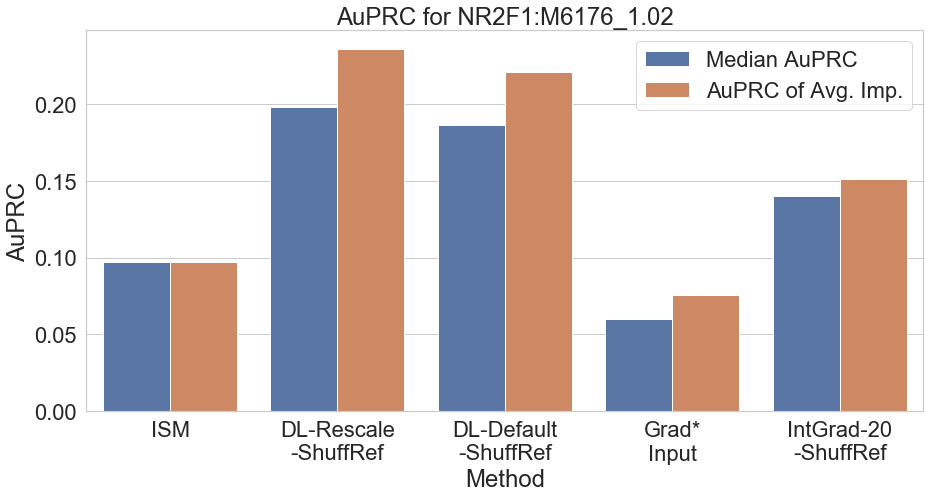

HNF1B:M6282_1.02


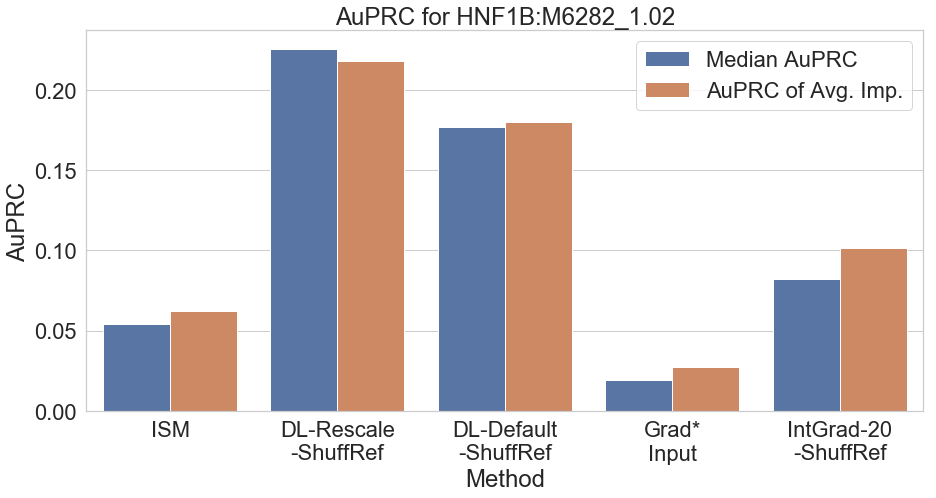

RXRG:M6462_1.02


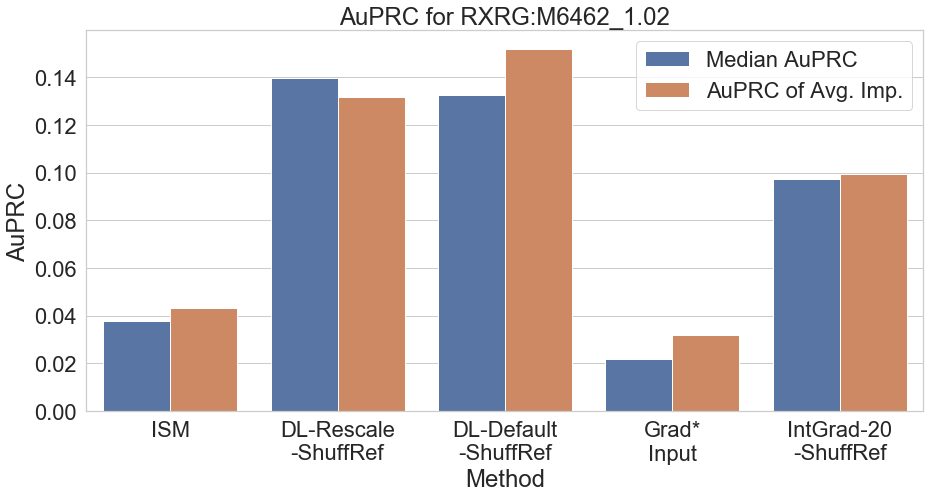

NR1H2:M6383_1.02


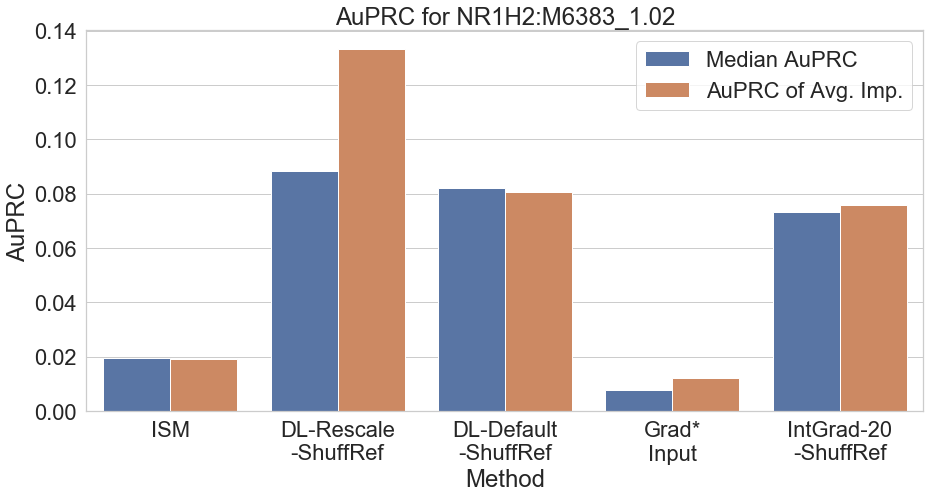

FOXA2:M4567_1.02


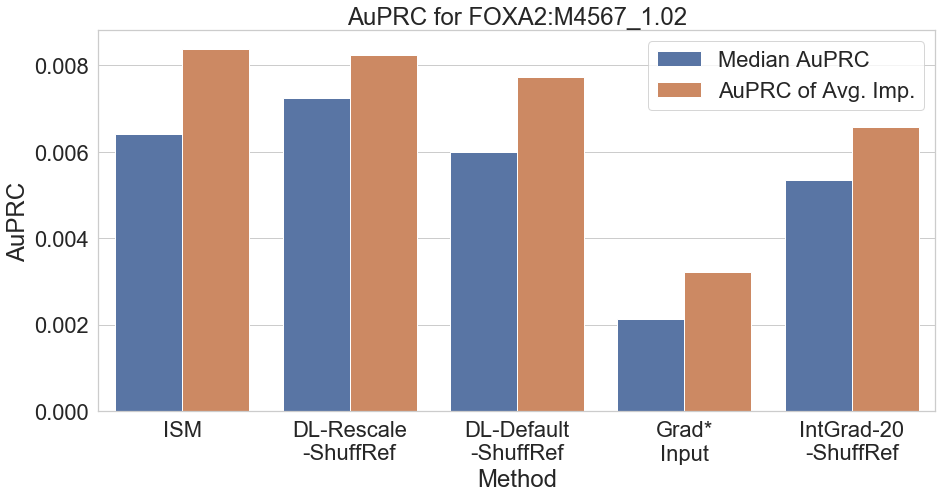

[('scores_deeplift_rescale_dinucshuff', 'DL-Rescale\n-ShuffRef'), ('scores_deeplift_rescale_avgposref', 'DL-Rescale\n-AvgPosRef'), ('scores_deeplift_rescale_flatref', 'DL-Rescale\n-ZerosRef')]


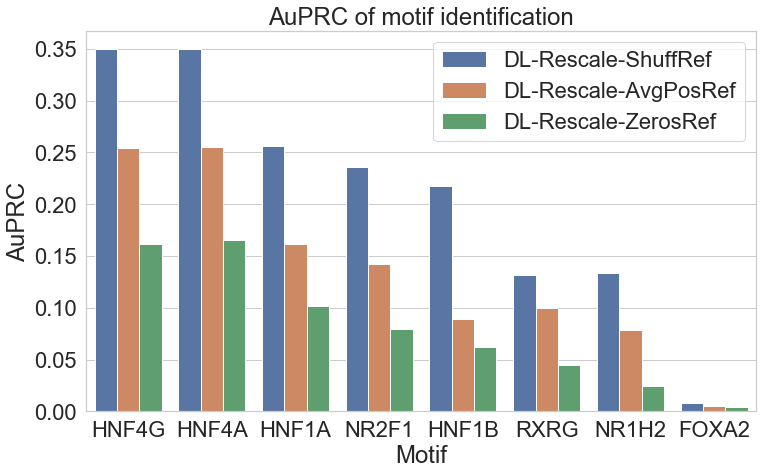

HNF4G:M2286_1.02


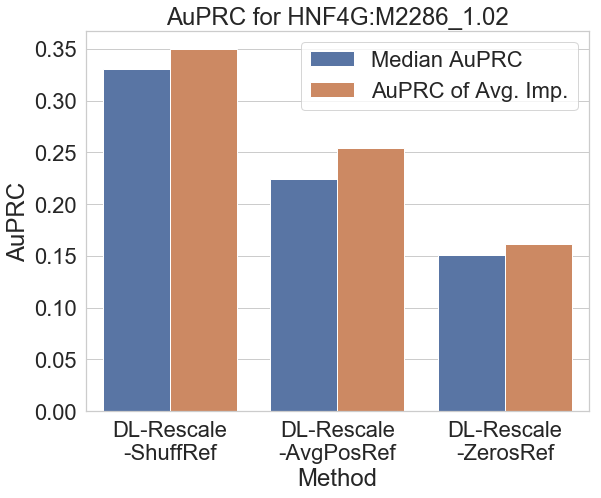

HNF4A:M4698_1.02


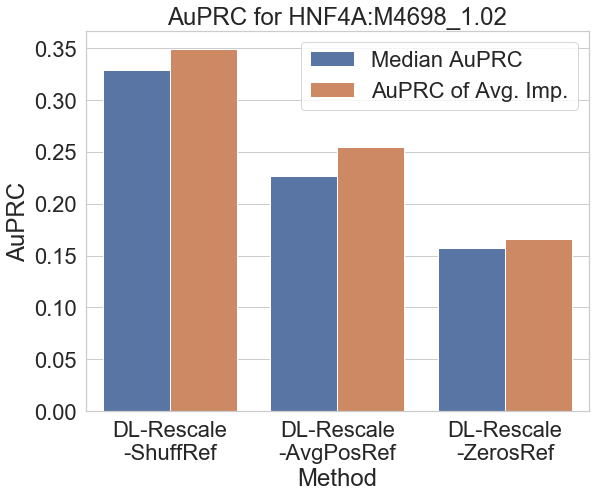

HNF1A:M6281_1.02


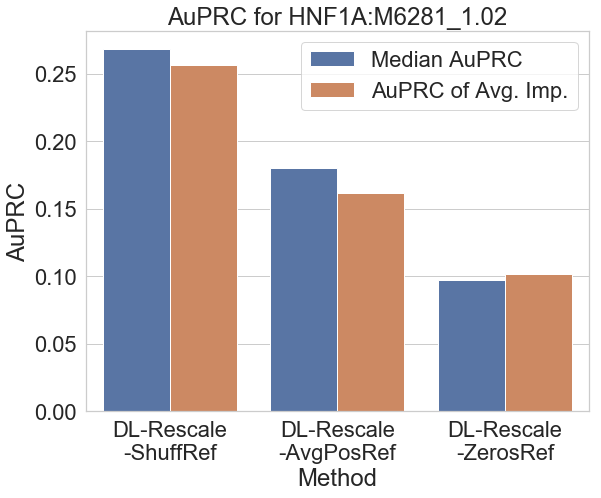

NR2F1:M6176_1.02


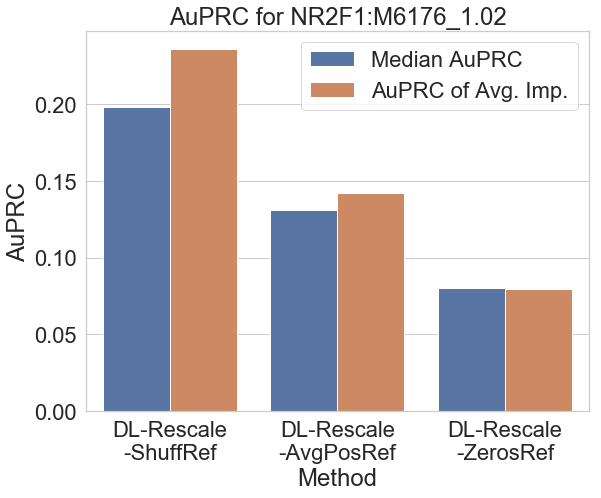

HNF1B:M6282_1.02


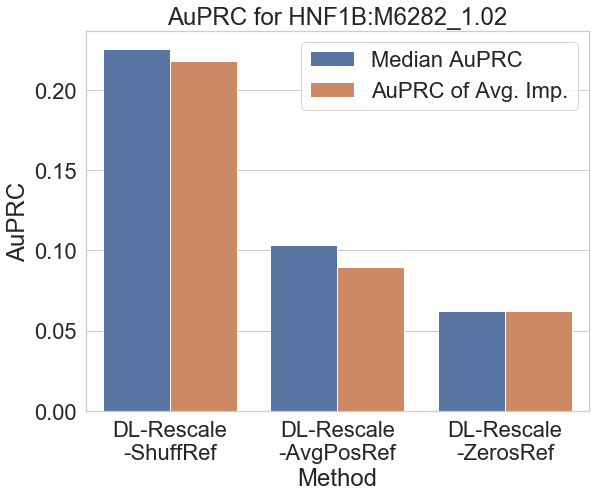

RXRG:M6462_1.02


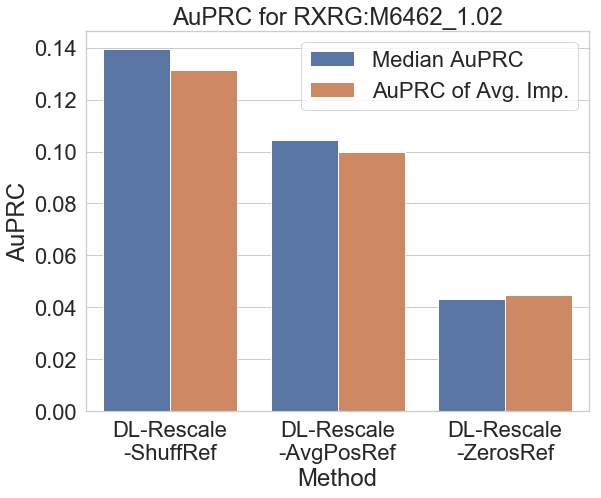

NR1H2:M6383_1.02


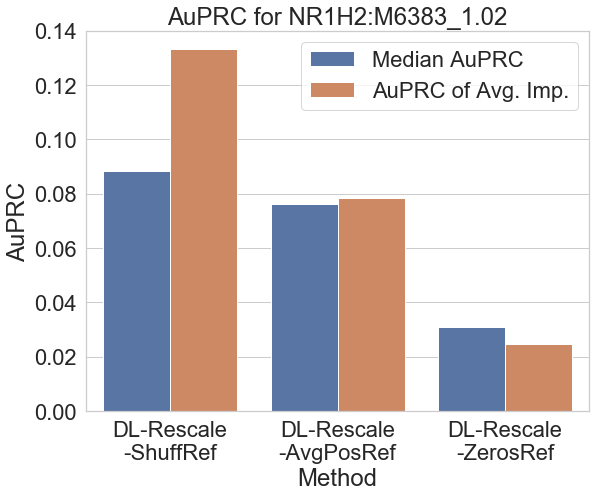

FOXA2:M4567_1.02


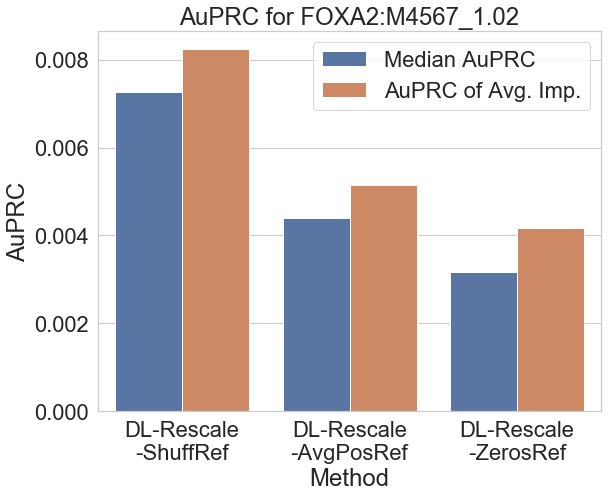

[('scores_deeplift_genomicsdefault_dinucshuff', 'DL-Default\n-ShuffRef'), ('scores_deeplift_genomicsdefault_avgposref', 'DL-Default\n-AvgPosRef'), ('scores_deeplift_genomicsdefault_flatref', 'DL-Default\n-ZerosRef')]


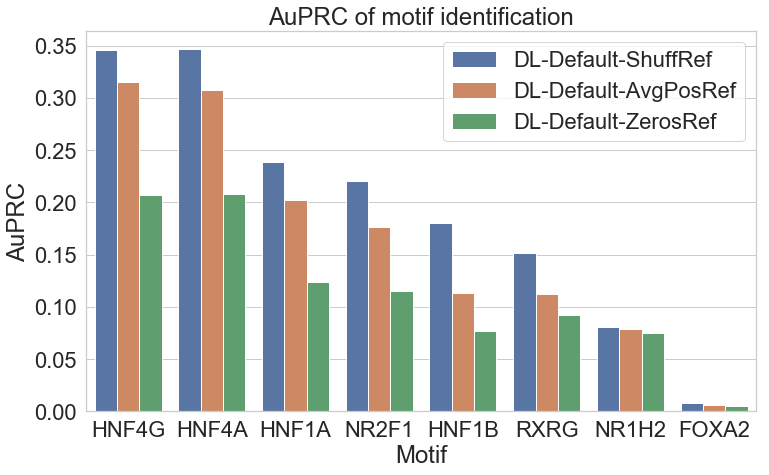

HNF4G:M2286_1.02


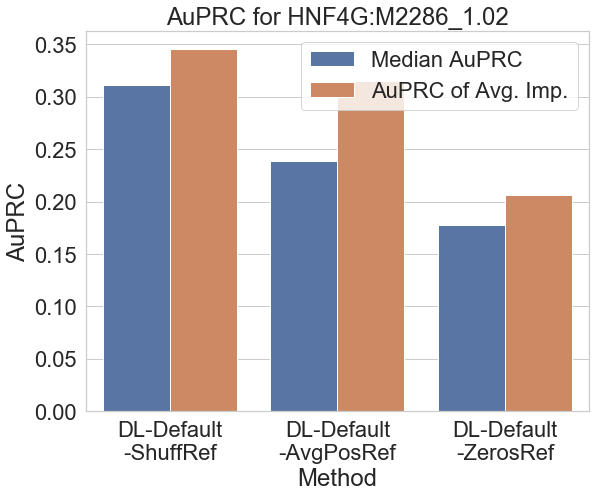

HNF4A:M4698_1.02


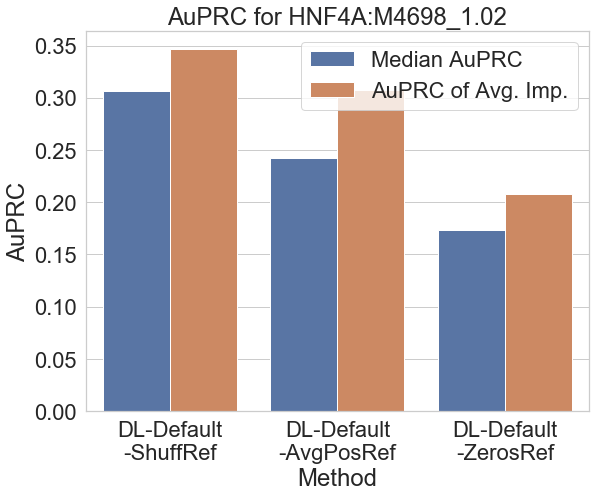

HNF1A:M6281_1.02


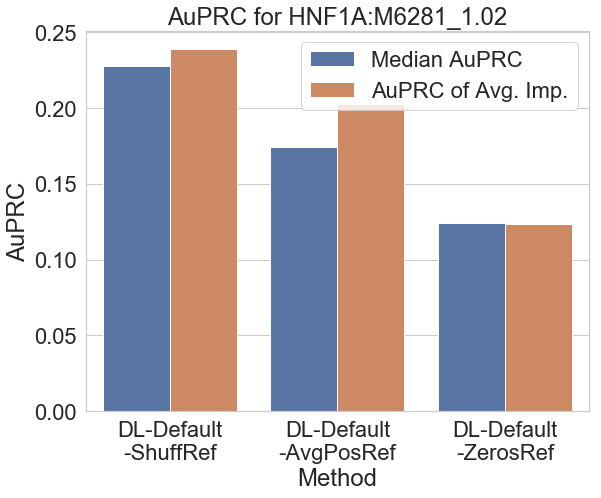

NR2F1:M6176_1.02


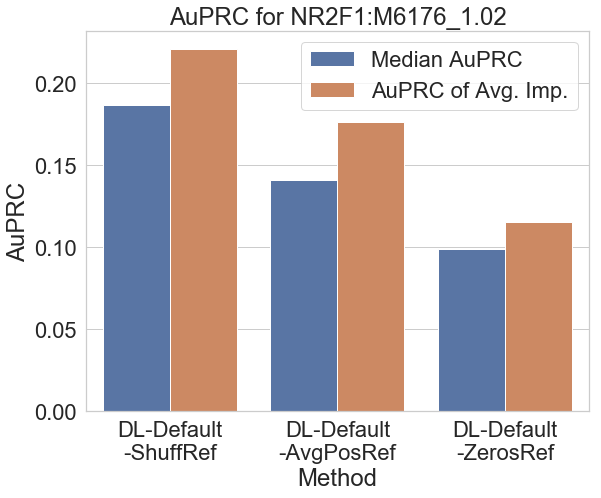

HNF1B:M6282_1.02


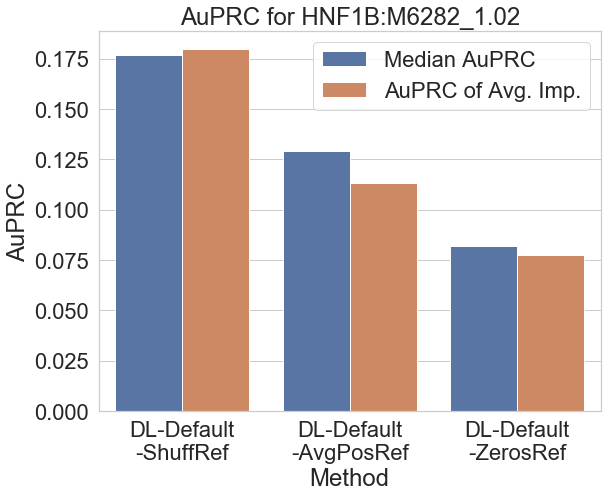

RXRG:M6462_1.02


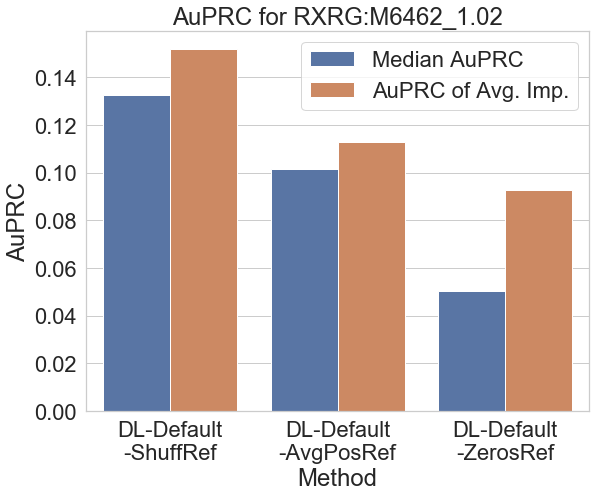

NR1H2:M6383_1.02


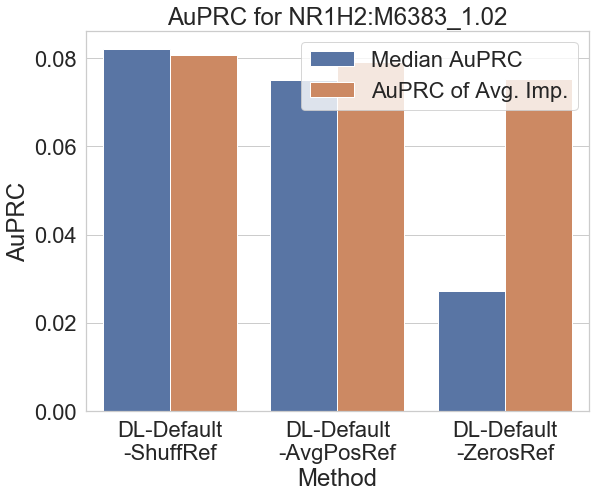

FOXA2:M4567_1.02


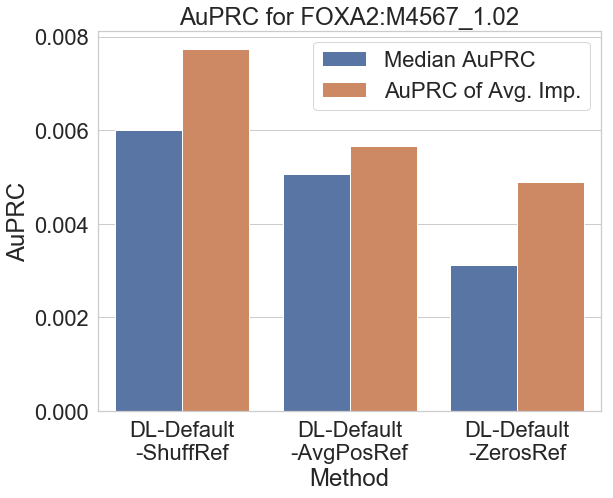

[('scores_integrated_grad20_dinucshuff', 'IntGrad-20\n-ShuffRef'), ('scores_integrated_grad20_avgposref', 'IntGrad-20\n-AvgPosRef'), ('scores_integrated_grad20_flatref', 'IntGrad-20\n-ZerosRef')]


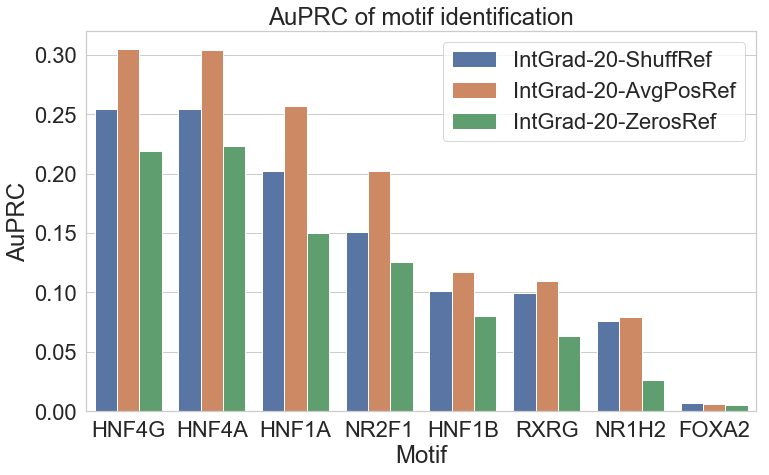

HNF4G:M2286_1.02


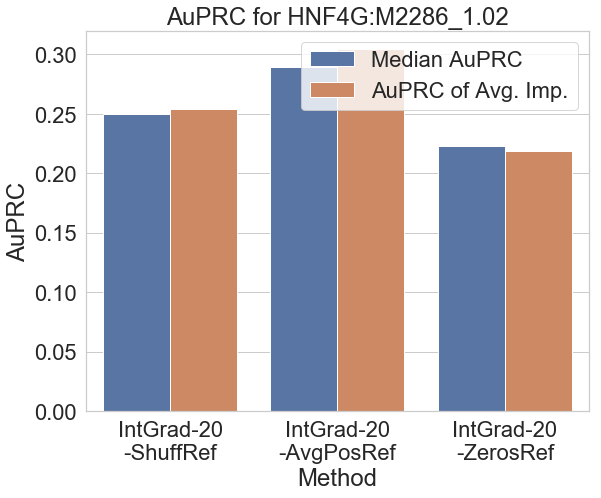

HNF4A:M4698_1.02


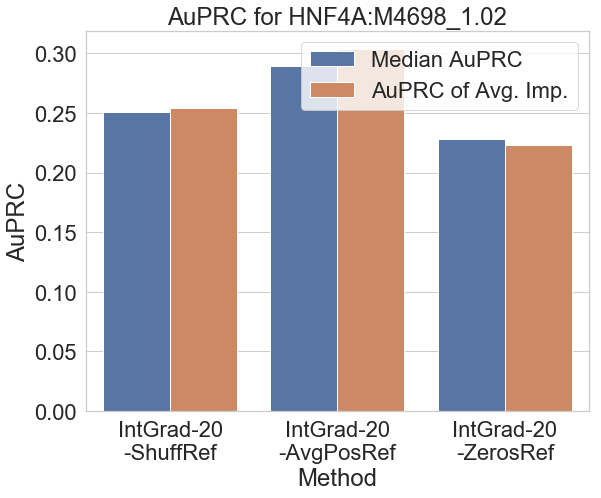

HNF1A:M6281_1.02


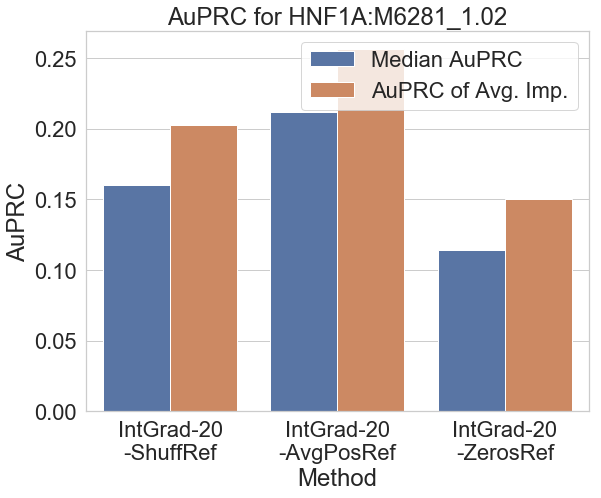

NR2F1:M6176_1.02


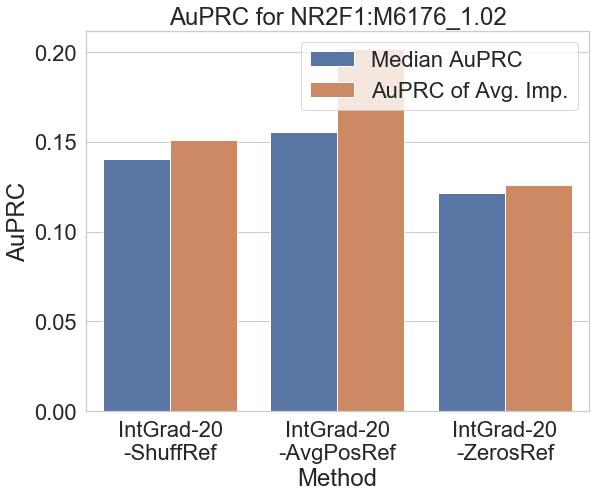

HNF1B:M6282_1.02


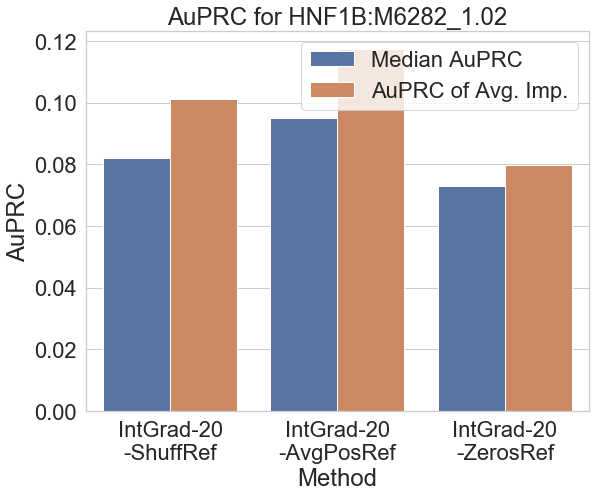

RXRG:M6462_1.02


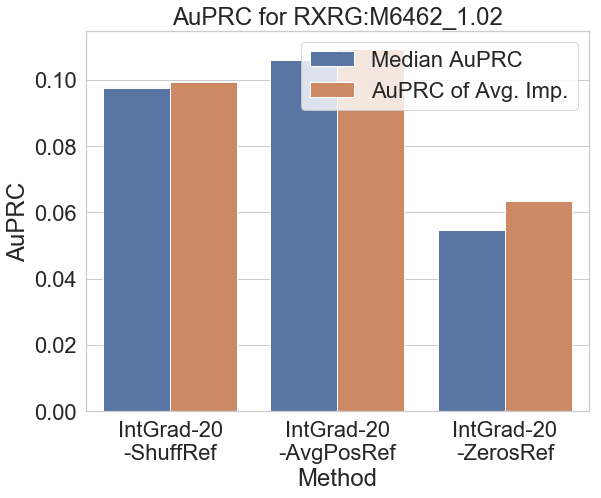

NR1H2:M6383_1.02


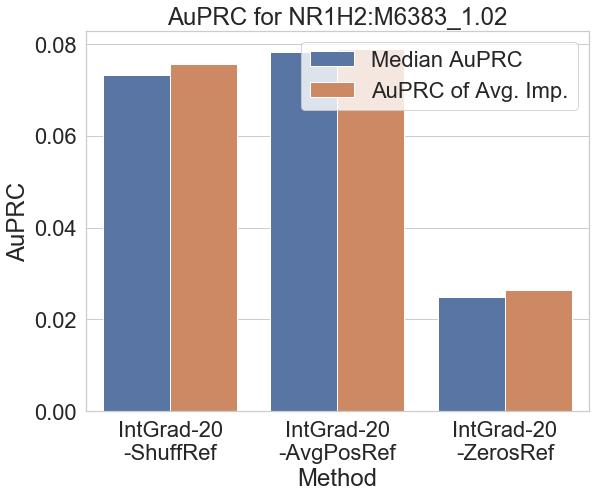

FOXA2:M4567_1.02


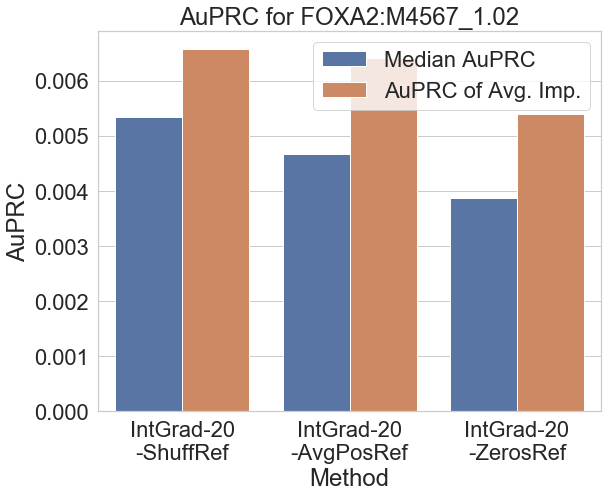

[('scores_integrated_grad20_dinucshuff', 'IntGrad-20\n-ShuffRef'), ('scores_integrated_grad10_dinucshuff', 'IntGrad-10\n-ShuffRef'), ('scores_integrated_grad5_dinucshuff', 'IntGrad-5\n-ShuffRef')]


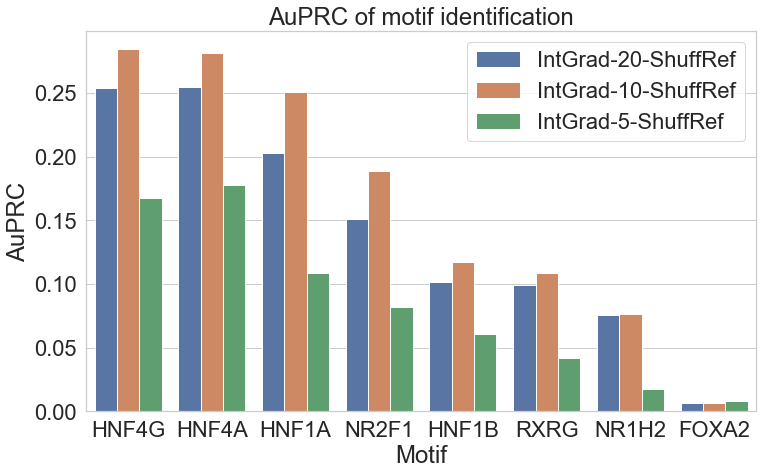

HNF4G:M2286_1.02


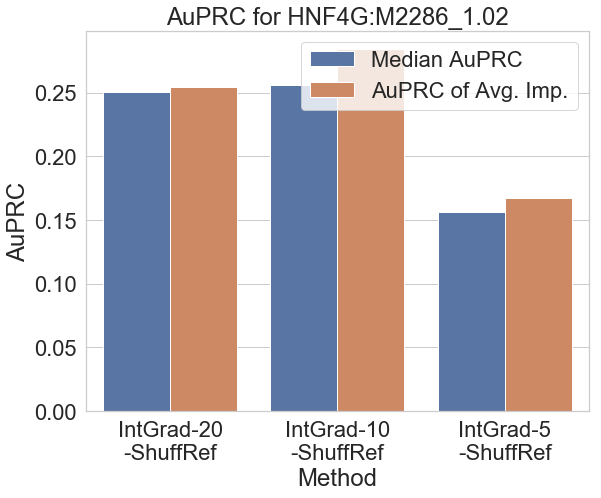

HNF4A:M4698_1.02


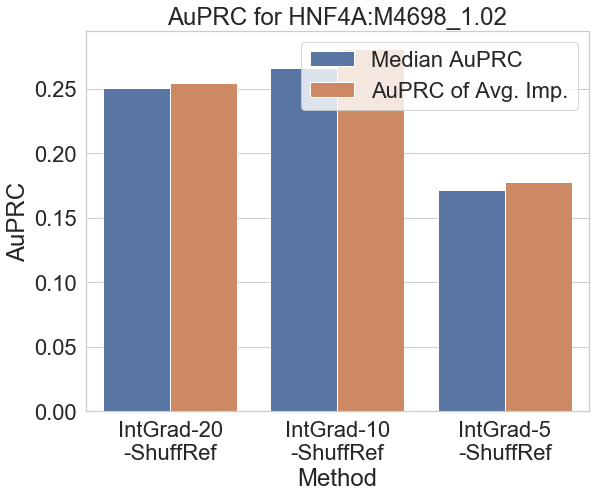

HNF1A:M6281_1.02


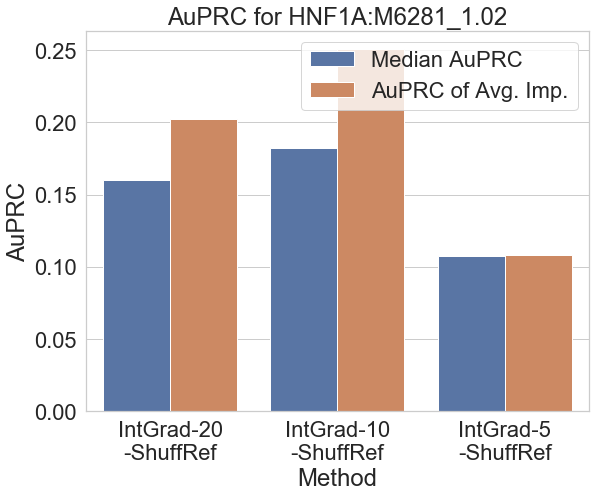

NR2F1:M6176_1.02


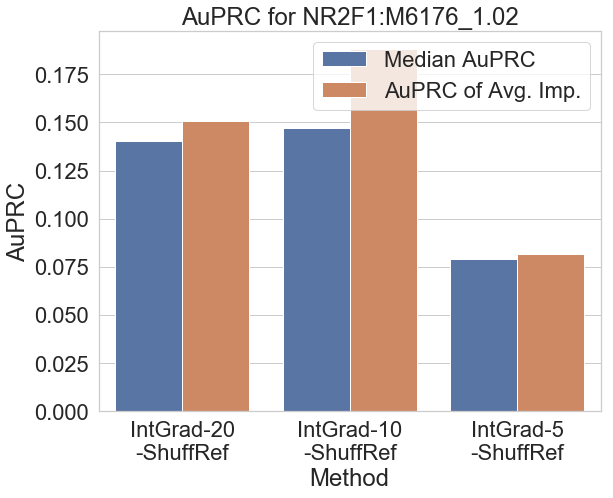

HNF1B:M6282_1.02


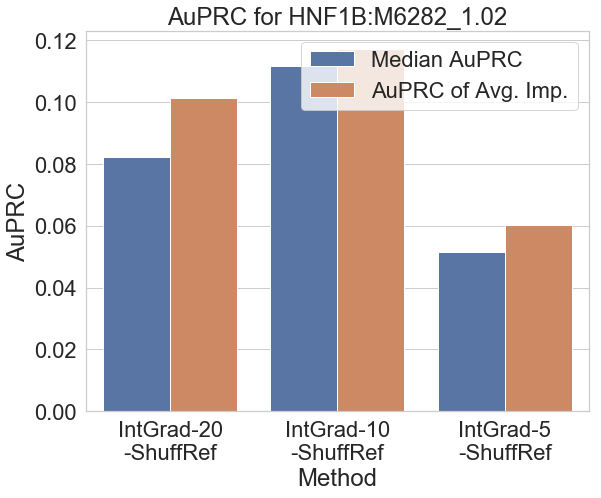

RXRG:M6462_1.02


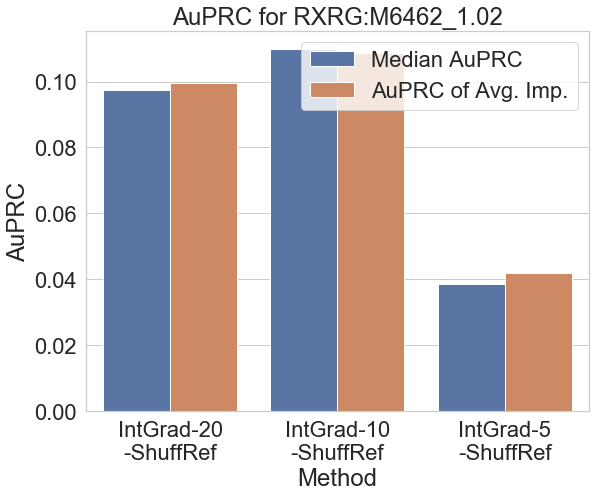

NR1H2:M6383_1.02


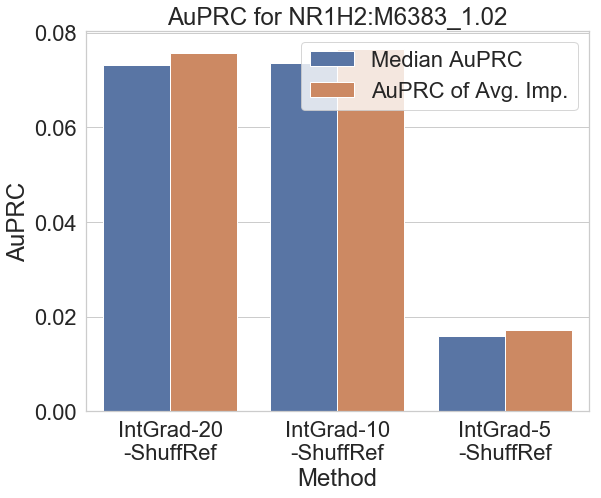

FOXA2:M4567_1.02


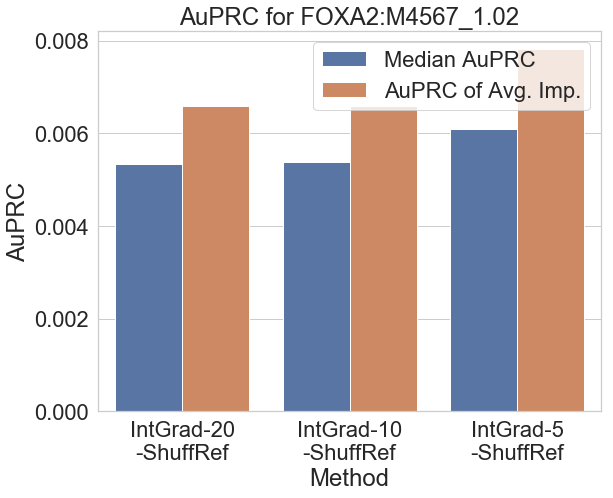

In [109]:
#### import seaborn as sns
matplotlib.rcParams.update({'font.size': 20})

def barplot_motif_perfs2(motif_names, method_names,
                         human_method_names, motif_to_method_to_measure_to_val):

    
    plt.figure(figsize=(4*len(method_names),7))
    
    pd_motif_name = []
    pd_perfs = []
    pd_method_name = []
    
    for method_name, human_method_name in zip(method_names, human_method_names):
        for motif_name in motif_names:
            pd_perfs.append(motif_to_method_to_measure_to_val[motif_name][method_name]['mean_scores'])
            pd_method_name.append(human_method_name.replace("\n",""))
            pd_motif_name.append(motif_name.split(":")[0])
                
    df = pd.DataFrame({
        'AuPRC': pd_perfs,
        'Method': pd_method_name,
        'Motif': pd_motif_name,
    })

    sns.set(style="whitegrid", font_scale=2)
    sns.barplot(x="Motif", y="AuPRC", hue="Method", data=df)
    plt.title("AuPRC of motif identification")
    plt.legend(loc='best')
    plt.show()

def barplot_motif_perfs1(motif_name, method_names,
                        human_method_names, motif_to_method_to_measure_to_val):

    
    plt.figure(figsize=(3*len(method_names),7))
    
    pd_perfs = []
    pd_method_name = []
    pd_measure = []
    
    for method_name, human_method_name in zip(method_names, human_method_names):
        for measure, human_measure_name in [
             #('min_indiv_perf', 'Min AuPRC'),
             ('median_indiv_perf', 'Median AuPRC'),
             ('mean_scores', 'AuPRC of Avg. Imp.'),
             #('max_indiv_perf', 'Max AuPRC')
        ]:
            pd_perfs.append(motif_to_method_to_measure_to_val[motif_name][method_name][measure])
            pd_method_name.append(human_method_name)
            pd_measure.append(human_measure_name)
            
    
    df = pd.DataFrame({
        'AuPRC': pd_perfs,
        'Method': pd_method_name,
        'measure': pd_measure,
    })

    sns.set(style="whitegrid", font_scale=2)
    sns.barplot(x="Method", y="AuPRC", hue="measure", data=df)
    plt.title("AuPRC for "+str(motif_name))
    plt.legend(loc='best')
    plt.show()

motif_names = [
 'HNF4G:M2286_1.02',
 'HNF4A:M4698_1.02',
 'HNF1A:M6281_1.02',
 'NR2F1:M6176_1.02',
 'HNF1B:M6282_1.02',
 'RXRG:M6462_1.02',
 'NR1H2:M6383_1.02',
 'FOXA2:M4567_1.02',
 ]
    
method_groupings = [
   [('scores_ism','ISM'),  
    ('scores_deeplift_rescale_dinucshuff','DL-Rescale\n-ShuffRef'),
    ('scores_deeplift_genomicsdefault_dinucshuff','DL-Default\n-ShuffRef'),
    ('scores_grad_times_inp_flatref','Grad*\nInput'),
    ('scores_integrated_grad20_dinucshuff','IntGrad-20\n-ShuffRef'),
    ],
    
    [
    ('scores_deeplift_rescale_dinucshuff','DL-Rescale\n-ShuffRef'),
    ('scores_deeplift_rescale_avgposref','DL-Rescale\n-AvgPosRef'),
    ('scores_deeplift_rescale_flatref','DL-Rescale\n-ZerosRef'),
    #('scores_grad_times_inp_flatref','Grad*Input'),
    ],
    
    [
    ('scores_deeplift_genomicsdefault_dinucshuff','DL-Default\n-ShuffRef'),
    ('scores_deeplift_genomicsdefault_avgposref','DL-Default\n-AvgPosRef'),
    ('scores_deeplift_genomicsdefault_flatref','DL-Default\n-ZerosRef'),
    #('scores_grad_times_inp_flatref','Grad*Input'),
    ],
    
    [
    ('scores_integrated_grad20_dinucshuff','IntGrad-20\n-ShuffRef'),
    ('scores_integrated_grad20_avgposref','IntGrad-20\n-AvgPosRef'),
    ('scores_integrated_grad20_flatref','IntGrad-20\n-ZerosRef'),
    #('scores_grad_times_inp_flatref','Grad*Input'),
    ],
    
    [
    ('scores_integrated_grad20_dinucshuff','IntGrad-20\n-ShuffRef'),
    ('scores_integrated_grad10_dinucshuff','IntGrad-10\n-ShuffRef'),
    ('scores_integrated_grad5_dinucshuff','IntGrad-5\n-ShuffRef'),
    #('scores_integrated_grad2_dinucshuff','IntGrad-2\n-ShuffRef'),
    ],
]

for method_grouping in method_groupings:
    print(method_grouping)
    method_names, human_method_names = zip(*method_grouping)
    
    barplot_motif_perfs2(motif_names=motif_names,
                         method_names=method_names,
                         human_method_names = human_method_names,
                         motif_to_method_to_measure_to_val=motif_to_method_to_measure_to_val)
    
    for motif_name in motif_names:
        print(motif_name)
        
        barplot_motif_perfs1(motif_name,
                             method_names=method_names,
                             human_method_names = human_method_names,
                             motif_to_method_to_measure_to_val=motif_to_method_to_measure_to_val)

In [ ]:
import matplotlib

def plot_pair_scatter(measure_1_name, measure_2_name, motif_to_measure_to_val):

    matplotlib.rcParams.update({'font.size': 16})
    plt.figure(figsize=(10,10))
    
    motif_names = sorted(motif_to_method_to_measure_to_val.keys())

    print([motif_to_measure_to_val[motif_name][measure_1_name]
                     for motif_name in motif_names])
    # Create dataframe
    x = [motif_to_measure_to_val[motif_name][measure_1_name]
                     for motif_name in motif_names]
    y = [motif_to_measure_to_val[motif_name][measure_2_name]
                     for motif_name in motif_names]
    df = pd.DataFrame({
    'x': x,
    'y': y,
    'group': [x.split(":")[0] for x in motif_names]
    })

    # basic plot
    p1=sns.regplot(data=df, x='x', y='y', fit_reg=False,
                   marker="o", color="skyblue", scatter_kws={'s':400})
    plt.xlim()

    # add annotations one by one with a loop
    offset_size = 
    for line in range(0,df.shape[0]):
         p1.text(df.x[line]+int(0.1*x, df.y[line], df.group[line],
                 horizontalalignment='left', size='medium',
                 color='black', weight='semibold')

    plt.show()
    
plot_pair_scatter("scores_ism_median_indiv_perf", "scores_ism_mean_scores", motif_to_measure_to_val)